## Importing the required libraries and loading the dataset

In [1]:
# !pip install LibRecommender

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
import random
import scipy.sparse as sp
# from libreco.data import random_split, DatasetPure
# from libreco.algorithms import LightGCN
# from libreco.evaluation import evaluate
from sklearn.preprocessing import LabelEncoder
import networkx as nx

In [3]:
from google.colab import drive
drive.mount("/content/drive")
df = pd.read_csv("/content/drive/MyDrive/WB_OLX/interactions.csv")

Mounted at /content/drive


In [4]:
df.head()

,user,item,event,timestamp
0,27901,56865,click,1581465600
1,124480,115662,click,1581465600
2,159509,5150,click,1581465600
3,188861,109981,click,1581465600
4,207348,88746,click,1581465600


## Basic statistics

In [5]:
df['event'].value_counts()

click                    58817263
contact_phone_click_1     1721338
bookmark                  1644602
chat_click                1399051
contact_chat               948470
contact_partner_click      459305
contact_phone_click_2      444497
contact_phone_click_3       67675
Name: event, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65502201 entries, 0 to 65502200
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   user       int64 
 1   item       int64 
 2   event      object
 3   timestamp  int64 
dtypes: int64(3), object(1)
memory usage: 2.0+ GB


In [7]:
n_users = df['user'].nunique()
n_items = df['item'].nunique()

print('Number of users: ', n_users)
print('Number of items: ', n_items)

Number of users:  3295942
Number of items:  185395


In [8]:
n_events_per_user = df.groupby('user').size()
n_events_per_item = df.groupby('item').size()

print('Average number of events per user: ', round(np.mean(n_events_per_user), 2), ' with a standard deviation of ', np.std(n_events_per_user))
print('Average number of events per item: ', round(np.mean(n_events_per_item), 2), ' with a standard deviation of ', np.std(n_events_per_item))

Average number of events per user:  19.87  with a standard deviation of  47.76236318850431
Average number of events per item:  353.31  with a standard deviation of  624.7732106025461


In [9]:
print('Median number of events per user: ', round(np.median(n_events_per_user), 2))
print('Median number of events per item: ', round(np.median(n_events_per_item), 2))

Median number of events per user:  6.0
Median number of events per item:  137.0


## Number of interactions per user

In [10]:
n_events_per_user.describe()

count    3.295942e+06
mean     1.987359e+01
std      4.776237e+01
min      1.000000e+00
25%      2.000000e+00
50%      6.000000e+00
75%      1.800000e+01
max      1.310000e+03
dtype: float64

<Axes: ylabel='Proportion'>

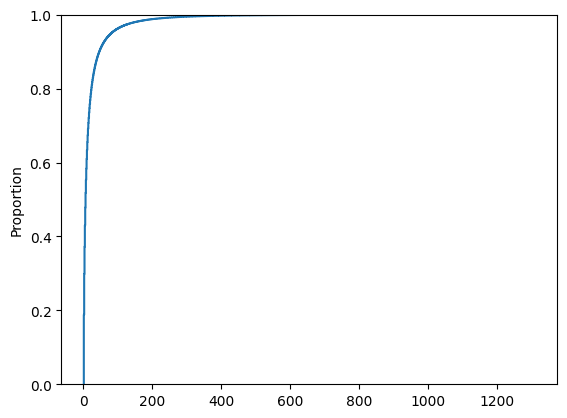

In [11]:
sns.ecdfplot(n_events_per_user)

<Axes: ylabel='Count'>

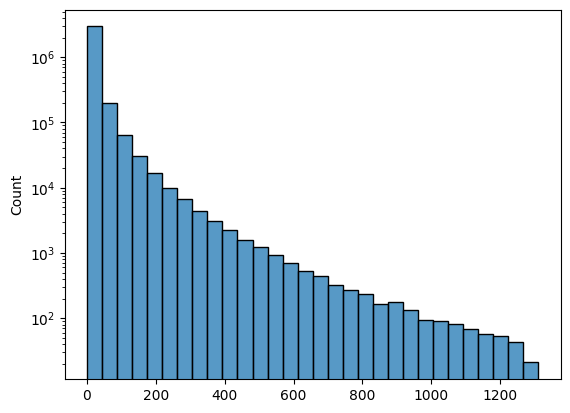

In [12]:
h1 = sns.histplot(n_events_per_user, bins=30)
h1.set_yscale("log")
h1

<Axes: >

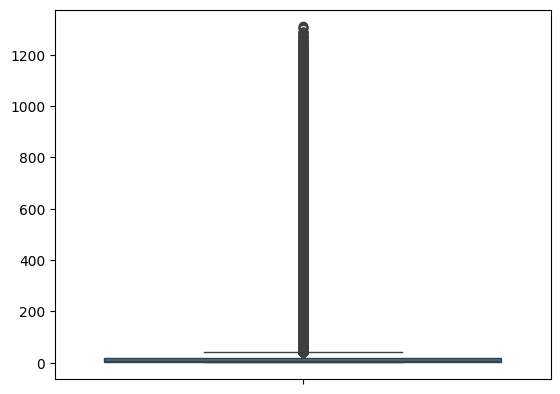

In [18]:
sns.boxplot(n_events_per_user)

<Axes: >

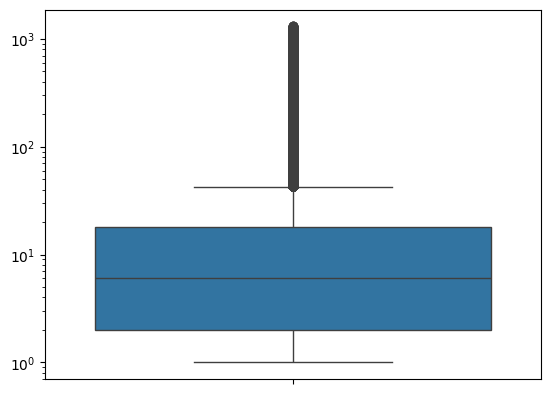

In [15]:
h = sns.boxplot(n_events_per_user)
h.set_yscale('log')
h

## Number of interactions per item

In [ ]:
n_events_per_item.describe()

count    185395.000000
mean        353.311583
std         624.774896
min           1.000000
25%           3.000000
50%         137.000000
75%         428.000000
max       15480.000000
dtype: float64

<Axes: ylabel='Proportion'>

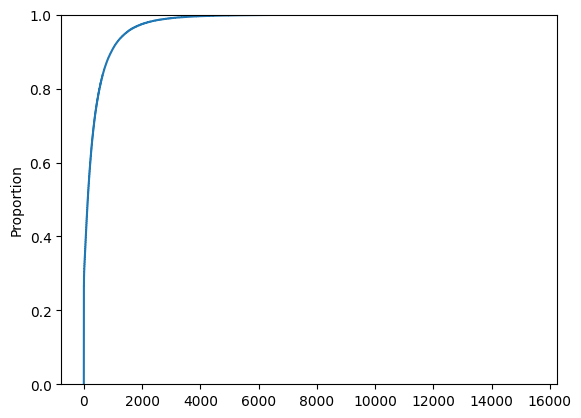

In [ ]:
sns.ecdfplot(n_events_per_item)

<Axes: ylabel='Count'>

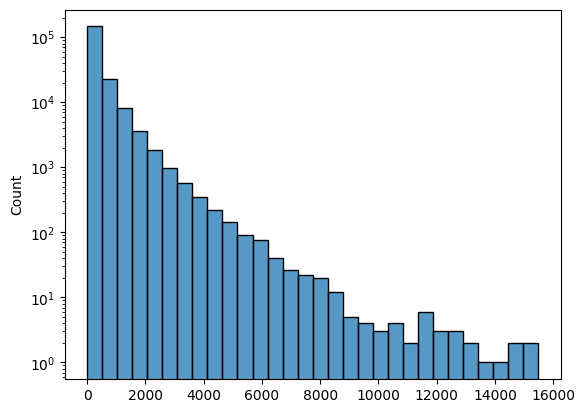

In [ ]:
h2 = sns.histplot(n_events_per_item, bins=30)
h2.set_yscale("log")
h2

<Axes: >

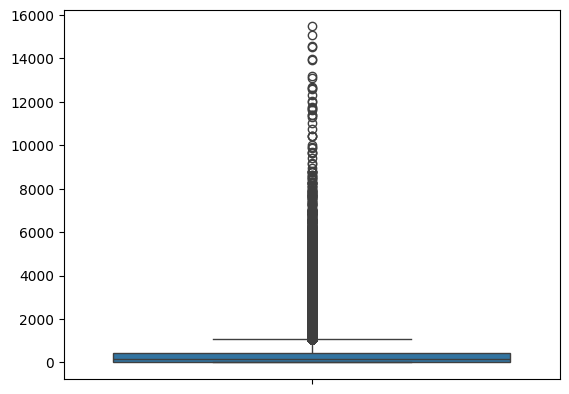

In [17]:
sns.boxplot(n_events_per_item)

<Axes: >

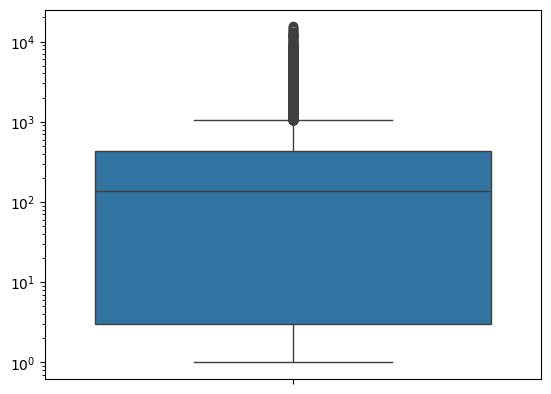

In [16]:
h4 = sns.boxplot(n_events_per_item)
h4.set_yscale('log')
h4

In [ ]:
n_events_per_item = df['item'].value_counts()
n_events_per_item

145769    15480
171495    15092
44153     14581
41518     14544
179685    13985
          ...  
118231        1
48346         1
85236         1
138689        1
81245         1
Name: item, Length: 185395, dtype: int64

In [ ]:
# prop = int(np.floor(n_items*0.1))
prop=100
top_items = n_events_per_item.head(prop)

In [ ]:
top_items.sort_values()

44689      6979
47799      6990
52647      7004
97375      7015
21203      7034
          ...  
179685    13985
41518     14544
44153     14581
171495    15092
145769    15480
Name: item, Length: 100, dtype: int64

<ipython-input-19-8eb47ea671c1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='item', y='count', data=top_items_df, palette='viridis')


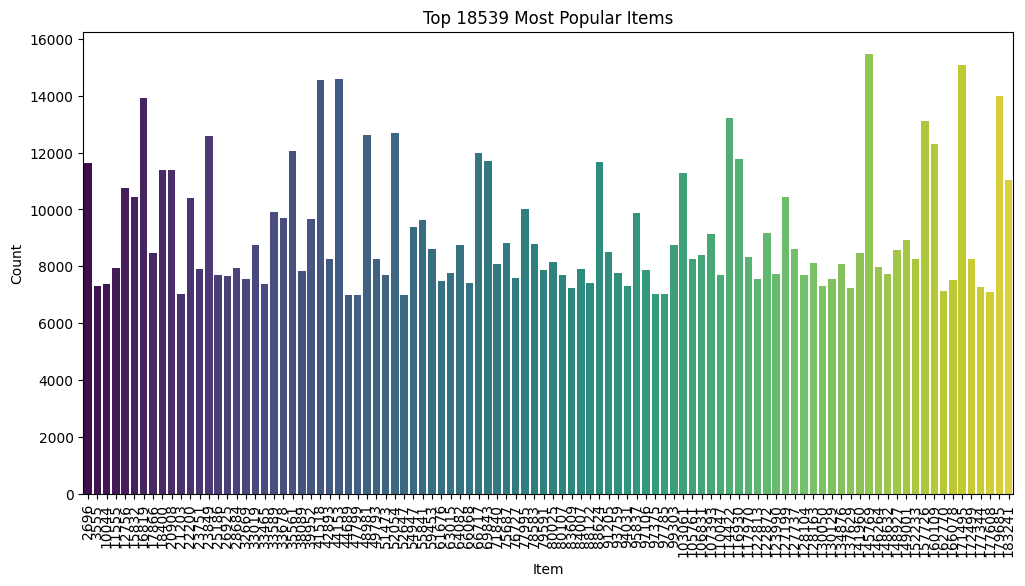

In [ ]:
# Create a DataFrame with the selected top items and their counts
top_items_df = pd.DataFrame({'item': top_items.index, 'count': top_items.values})

# Create a Seaborn barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='item', y='count', data=top_items_df, palette='viridis')
plt.xticks(rotation=90)
plt.title(f'Top {prop} Most Popular Items')
plt.xlabel('Item')
plt.ylabel('Count')
plt.show()